In [1]:
# Imports and data loading 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

# Supress the unnumbered hordes of warnings that make output completely unreadable
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']

iris_data = pd.read_csv('../input/iris.data', names=feature_names)
data = iris_data.loc[:, 'sepal length':'petal width']
target = iris_data.loc[:, 'species']

label_encoder = LabelEncoder()
label_encoder.fit(target)
print('Target classes: {}'.format(label_encoder.classes_))
print('Target class numbers: {}'.format(label_encoder.transform(label_encoder.classes_)))
target_numeric = label_encoder.transform(target)

Target classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Target class numbers: [0 1 2]


### Read the manual 
>Title: Iris Plants Database

It's about plants. This may seem obvious, given the fame of this dataset, but it is good practice to notice this sort of information when it is available. 

>Publications: too many to mention!!!  Here are a few.

Again, this may seem a strange observation to remark upon, but if it's been used in 'too many [publications] to mention', then there's probably something worth noting about it, and it's probably important that we note it as well. 

>The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

Three classes, with 50 instances each. Perfectly balanced. 

>One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

That's what's notable about it - a lack of linear separability. How to confirm this in the EDA? Which models will be unable to properly differentiate between the latter two classes? (The linear ones obviously, but are there any others that perform poorly?)

>Number of Attributes: 4 numeric, predictive attributes and the class

Four features, all numeric. 

>Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

Repetition of what's already been determined above, with one extra: the feature data is **continuous ratio** data. 

>Missing Attribute Values: None

There is no missing data. 

>Summary Statistics:

|Class|Min|Max|Mean|SD|Class Correlation|
|---|---|---|---|---|---|
|sepal length:|4.3 | 7.9  | 5.84|  0.83  |  0.7826  |   
|sepal width:|2.0 | 4.4  | 3.05 | 0.43 |  -0.4194  |
|petal length:|1.0 | 6.9 |  3.76 | 1.76  |  0.9490  (high!)  |
|petal width:|0.1 | 2.5 |  1.20 | 0.76  |  0.9565  (high!)  |

Summary statistics provided. Class Correlation is inspecific as to which class, and therefore is useless. 

So, the classes are balanced, two of them are not linearly separable from each other, the data type of the features is continuous ratio, and none of the data is missing.  
The data:feature ratio is 150:4, which reduces to 37.5:1, which is not a bad ratio. 

In [2]:
# Lets take a look at a random sample of the data:
iris_data.sample(5, random_state=4)

,sepal length,sepal width,petal length,petal width,species
128,6.4,2.8,5.6,2.1,Iris-virginica
18,5.7,3.8,1.7,0.3,Iris-setosa
130,7.4,2.8,6.1,1.9,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica


All feature data is numeric and in a similar scale. Target data is categorical nominal, and will have to be converted to a numeric representation. 

In [3]:
# Descriptive statistics
iris_data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Somewhat more detail that was provided by the manual, though lacking the inspecific correlation data. The rest of the statistical description from the manual matches what is shown here. 

There are 150 instances of each feature, which makes this dense data. 

Given the positions of the means relative to the min/max and percentiles, it would appear that the data is very normally distributed. This will be confirmed later. 

Descriptive statistics - target variable: 
Count: 150
Mean: 1.00
Min/Max: (0, 2)


<BarContainer object of 3 artists>

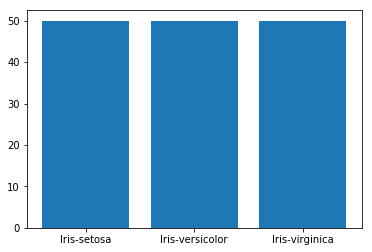

In [4]:
# Look at the target variable 
target_desc = stats.describe(target_numeric)
print('''Descriptive statistics - target variable: 
Count: {}
Mean: {}
Min/Max: {}'''
      .format(target_desc.nobs,
              '%.2f' % target_desc.mean,
              target_desc.minmax))

fig_1, ax_1 = plt.subplots()
ax_1.bar(label_encoder.classes_.tolist(), target.value_counts().values)

The classes are perfectly balanced. 

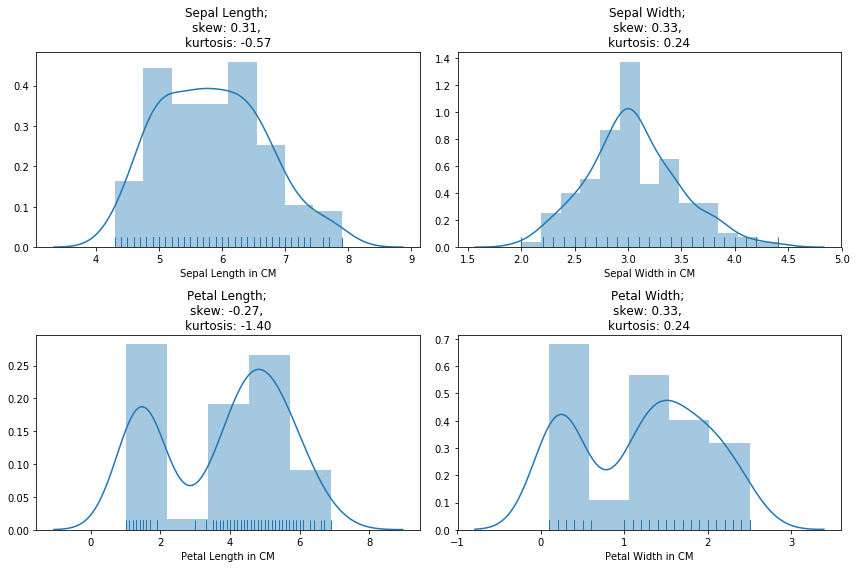

In [5]:
# Look at the feature variables
fig_2, ax_2 = plt.subplots(2,2,figsize=(12,8))

sepal_length_stats = stats.describe(data['sepal length']);
sepal_width_stats = stats.describe(data['sepal width']);
petal_length_stats = stats.describe(data['petal length']);
petal_width_stats = stats.describe(data['sepal width']);

sns.distplot(a=data['sepal length'], hist=True, kde=True, rug=True, ax=ax_2[0][0], axlabel='Sepal Length in CM').set_title('Sepal Length; \nskew: {}, \nkurtosis: {}'.format('%.2f' % sepal_length_stats.skewness, '%.2f' % sepal_length_stats.kurtosis))
sns.distplot(a=data['sepal width'], hist=True, kde=True, rug=True, ax=ax_2[0][1], axlabel='Sepal Width in CM').set_title('Sepal Width; \nskew: {}, \nkurtosis: {}'.format('%.2f' % sepal_width_stats.skewness, '%.2f' % sepal_width_stats.kurtosis))
sns.distplot(a=data['petal length'], hist=True, kde=True, rug=True, ax=ax_2[1][0], axlabel='Petal Length in CM').set_title('Petal Length; \nskew: {}, \nkurtosis: {}'.format('%.2f' % petal_length_stats.skewness, '%.2f' % petal_length_stats.kurtosis))
sns.distplot(a=data['petal width'], hist=True, kde=True, rug=True, ax=ax_2[1][1], axlabel='Petal Width in CM').set_title('Petal Width; \nskew: {}, \nkurtosis: {}'.format('%.2f' % petal_width_stats.skewness, '%.2f' % petal_width_stats.kurtosis))

plt.tight_layout()

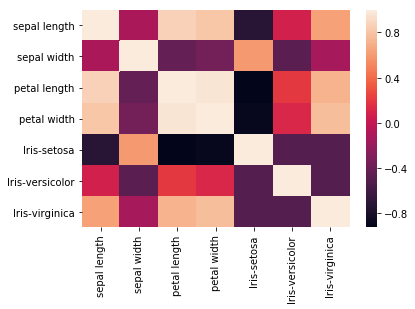

In [6]:
# Correlation heatmap
data_and_target = data.copy(deep=True)

lb = LabelBinarizer()
lb.fit(target)
target_binarized = lb.transform(target)

data_and_target[label_encoder.classes_[0]] = target_binarized[:,0]
data_and_target[label_encoder.classes_[1]] = target_binarized[:,1]
data_and_target[label_encoder.classes_[2]] = target_binarized[:,2]

sns.heatmap(data_and_target.corr())

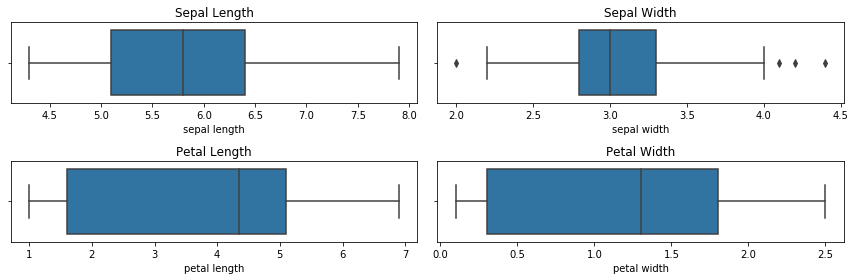

In [7]:
# Boxplots (outlier detection)
fig_3, ax_3 = plt.subplots(2,2,figsize=(12,4))

sns.boxplot(x=data['sepal length'], ax=ax_3[0][0]).set_title('Sepal Length');
sns.boxplot(x=data['sepal width'], ax=ax_3[0][1]).set_title('Sepal Width');
sns.boxplot(x=data['petal length'], ax=ax_3[1][0]).set_title('Petal Length');
sns.boxplot(x=data['petal width'], ax=ax_3[1][1]).set_title('Petal Width');

fig_3.tight_layout()

Only one feature has outliers, and even then only four of them. 

At this point there is little indication of anthing that needs to be done. However, since this dataset is famous for it's linear inseparability, and that makes a massive difference to what kinds of models can learn well from it, it makes sense to try and find a way to discover that in the EDA. I can then apply this method in future EDAs. 

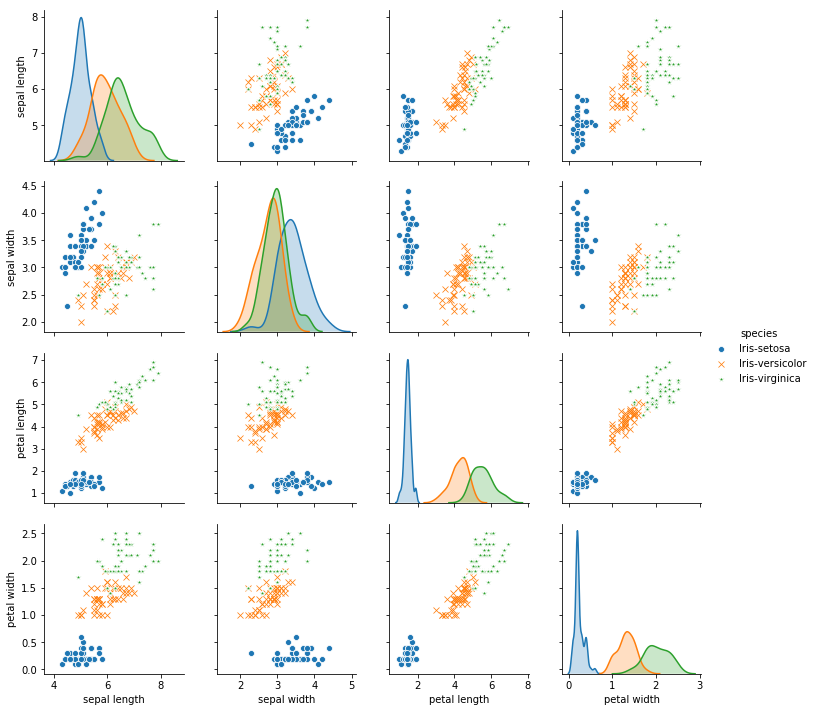

In [8]:
# Pariplot to look for visually similar classes
sns.pairplot(data=iris_data, hue='species', markers=['o', 'x', '*'])

It is obvious that the two classes 'iris versicolor' and 'iris virginica' are very similar, while 'iris setosa' is distinctly located in feature space.  

The pervasive overlap between 'iris versicolor' and 'iris virginica' across all features indicates that they are not linearly separable. Looking at this more closely: 

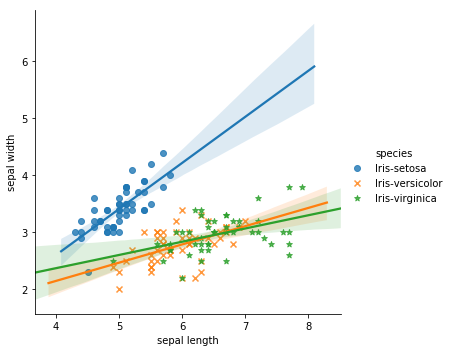

In [9]:
sns.lmplot(x='sepal length', y='sepal width', hue='species', markers=['o', 'x', '*'], data=iris_data)